# Problem Statement

Airbnb is an online-based marketing company that connects people looking for accommodation (Airbnb guests) to people looking to rent their properties (Airbnb hosts) on a short-term or long-term basis

Airbnb generates tons of data including but not limited to: density of rentals across regions (cities and neighborhoods), price variations across rentals, host-guest interactions in the form of reviews,


The goals of this projects are to answer questions such as: (i) how are rental properties distributed across the neighborhoods of NYC (there are 221 neighborhoods); (ii) how do prices vary with respect neighborhoods, rental property types and rental amenities; (iii) more importantly, how well can machine learning models be trained to predict Airbnb rental prices using features such as rental property type, the number of people a rental can accommodate, the number of available beds, and so forth.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 

C:\Users\sneha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("NYC.csv")

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

The objective of the analysis is to:

estimate listing price based on provided information
derive additional useful and interesting insights

In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
cols = df.columns
num_cols = df._get_numeric_data().columns
a=list(set(cols) - set(num_cols))
print('No of Categorical columns:',len(a),"\n",a)

No of Categorical columns: 6 
 ['host_name', 'neighbourhood', 'room_type', 'neighbourhood_group', 'name', 'last_review']


In [7]:
print("No of Continuous columns:",len(df._get_numeric_data().columns))

No of Continuous columns: 10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed.

In [10]:
#Total percentage of NaN values in the dataset
total_cells=np.product(df.shape)
missing_value_counts=df.isna().sum()
missing_cells=missing_value_counts.sum()
print("Percentage of NaN values: %.2f%% " % (missing_cells/total_cells*100))

Percentage of NaN values: 2.57% 


In [11]:
df['reviews_per_month'].interpolate(method='linear',inplace=True)

In [12]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df.sample(3)

id                               name   host_id host_name  \
7633    5743959            Private Room Available!  29792577      Nina   
1746     789559  Love NYC!  Luxury Apt Upper West    4160421      Adam   
37104  29496193       Cozy + Chic Harlem Apartment  33869262  Madeline   

      neighbourhood_group    neighbourhood  latitude  longitude  \
7633            Manhattan           Harlem  40.82171  -73.95515   
1746            Manhattan  Upper West Side  40.77775  -73.98732   
37104           Manhattan           Harlem  40.82364  -73.94472   

             room_type  price  minimum_nights  number_of_reviews last_review  \
7633      Private room     50               1                  6  2016-08-16   
1746   Entire home/apt    295              10                 11  2017-06-24   
37104  Entire home/apt    125               2                 19  2019-06-30   

       reviews_per_month  calculated_host_listings_count  availability_365  
7633                0.12                               1                 0  
1746                0.14                               1                 0  
37104               2.35                               1                37

In [14]:
df=df.drop(['name','host_name','last_review'],axis=1)

Drop 'host_name' because it is insignificant and also due to ethical reasons. There should be no reason to continue data exploration and model training towards specific individuals based on their names. Those names are assigned to actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us.

In [15]:
df.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               2.51                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
df.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.303634  0.277187 -0.007502   0.127117   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.016961       -0.080054           0.485214   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                reviews_per_month  \
id                                       0.303634   
host_id                                  0.277187   
latitude                                -0.007502   
longitude                                0.127117   
price                                   -0.016961   
minimum_nights                          -0.080054   
number_of_reviews                        0.485214   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.009890   
availability_365                         0.174342   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                     0.009890   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.174342  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

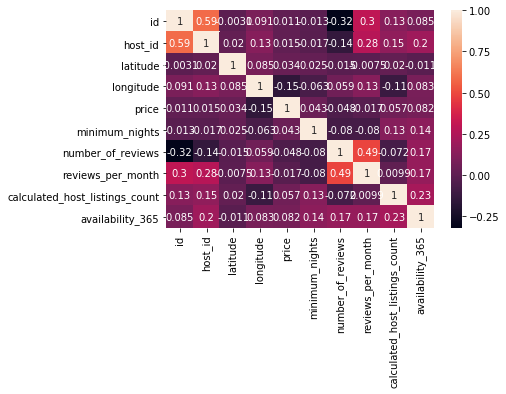

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

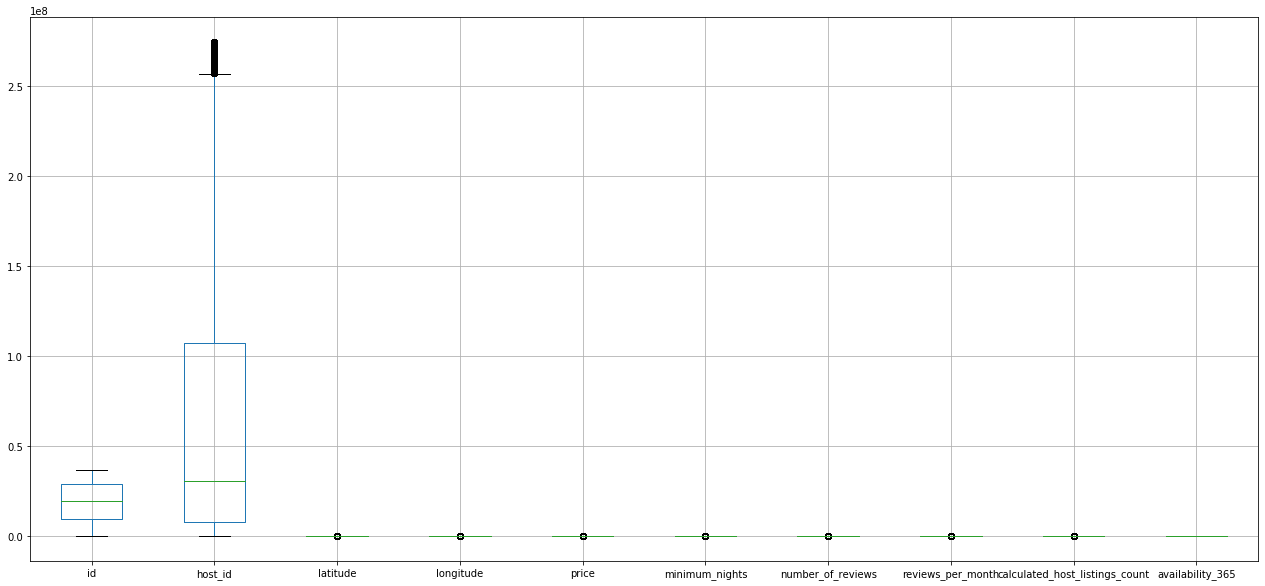

In [18]:
df.boxplot(column=['id', 'host_id', 'latitude',
       'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],figsize=(22,10))

# Univariant Analysis

#### This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes.
#### We are performing univariant analysis on our response variable which is Price

In [19]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

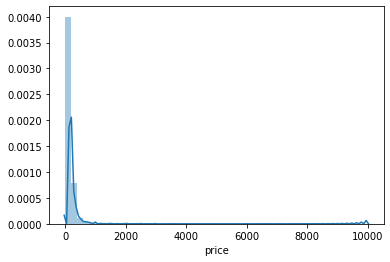

In [20]:
# Univariant Analysis
sns.distplot(df['price'])

In [21]:
from scipy.stats import kurtosis
from scipy.stats import skew
print('Skewness: %f'%skew(df['price']))
print('Kurtosis: %f'%kurtosis(df['price']))
#Positively Skewed

Skewness: 19.118352
Kurtosis: 585.612867


### Skewness
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

2. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

3. If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

### Kurtosis
1. Mesokurtic: This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.
 
2. Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. 
    
3. Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.

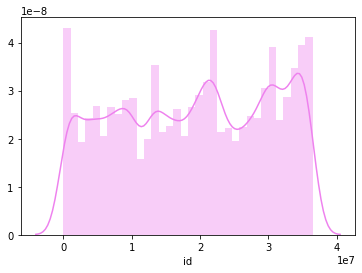

In [22]:
sns.distplot(df['id'],color="violet")

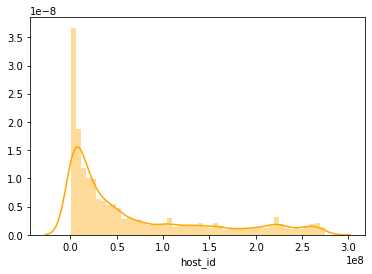

In [23]:
sns.distplot(df['host_id'],color="orange")
#Positively Skewed

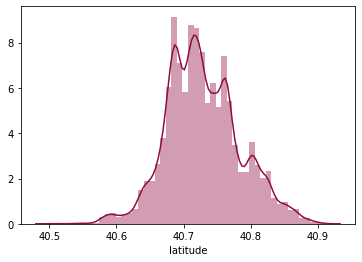

In [24]:
sns.distplot(df['latitude'],color="#900C3F")

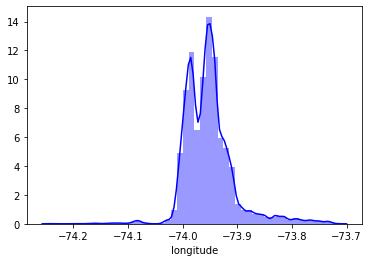

In [25]:
sns.distplot(df['longitude'],color="blue")

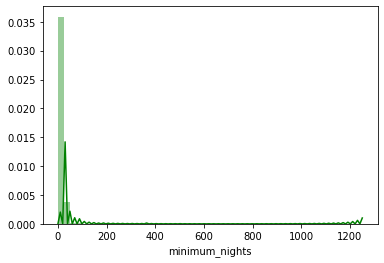

In [26]:
sns.distplot(df['minimum_nights'],color="green")
# Positively Skewed

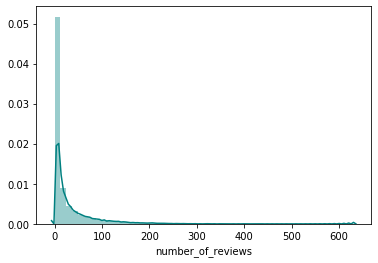

In [27]:
sns.distplot(df['number_of_reviews'],color="teal")
# Positively Skewed

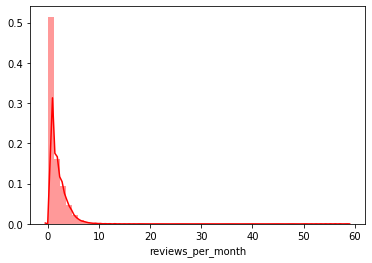

In [28]:
sns.distplot(df['reviews_per_month'],color="red")
# Positively Skewed

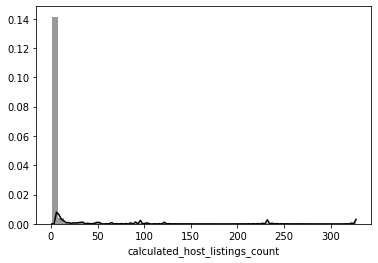

In [29]:
sns.distplot(df['calculated_host_listings_count'],color="black")
# Positively Skewed

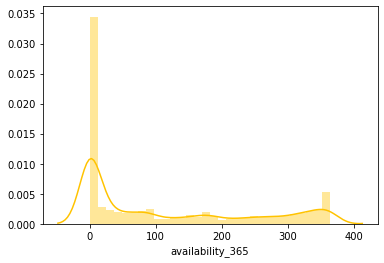

In [30]:
sns.distplot(df['availability_365'],color="#FFC300")
# Positively Skewed

In [31]:
top_host=df.host_id.value_counts().head(10)
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

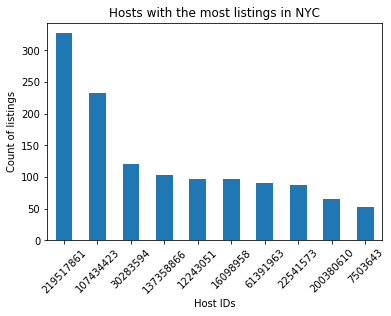

In [32]:
th=top_host.plot(kind='bar')
th.set_title('Hosts with the most listings in NYC')
th.set_ylabel('Count of listings')
th.set_xlabel('Host IDs')
th.set_xticklabels(th.get_xticklabels(), rotation=45)
plt.show()

# Independent Variables (categorical variables)
Visualization of the categorical variables. A categorical variable or feature can have only a finite set of values.

In [33]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [34]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [35]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

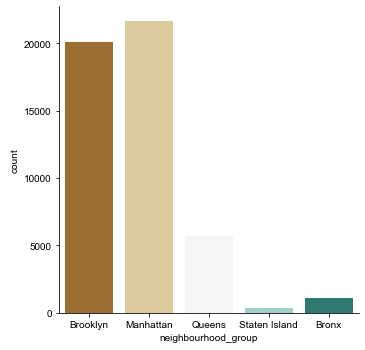

In [36]:
sns.catplot(x="neighbourhood_group", kind="count", data=df,palette="BrBG");
sns.set_style('darkgrid')
plt.show()

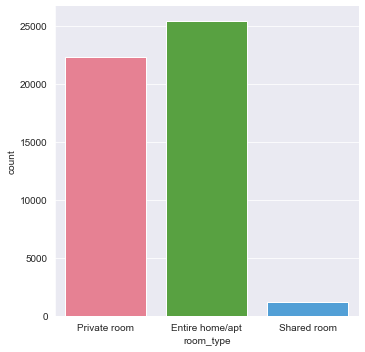

In [37]:
sns.catplot('room_type',kind = 'count',data = df,palette="husl")

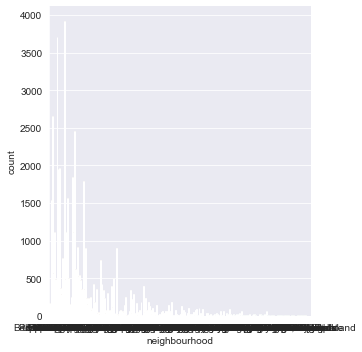

In [38]:
sns.catplot('neighbourhood',kind='count',data=df,palette="BrBG")

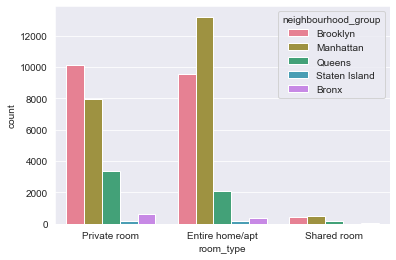

In [39]:
#room type based on the neighbourhood
sns.countplot(x = 'room_type', hue = 'neighbourhood_group', data = df,palette="husl")

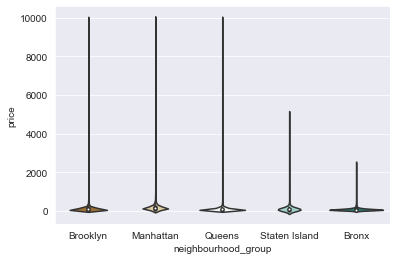

In [40]:
sns.violinplot(data=df, x='neighbourhood_group', y='price',palette="BrBG")
# Density and distribution of prices for each neighberhood_group

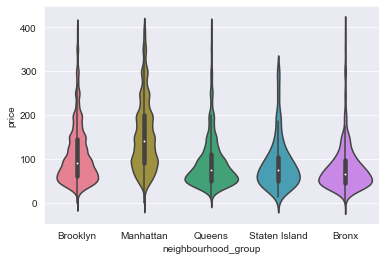

In [41]:
priceless400=df[df['price']<400]
sns.violinplot(data=priceless400, x='neighbourhood_group', y='price',palette="husl")
# Density and distribution of prices for each neighberhood_group

Manhattan has the highest range of prices for the listings with around 150 dollars price as average observation, followed by Brooklyn with around 90 dollars per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

### USING LATITUDE AND LONGITUDE

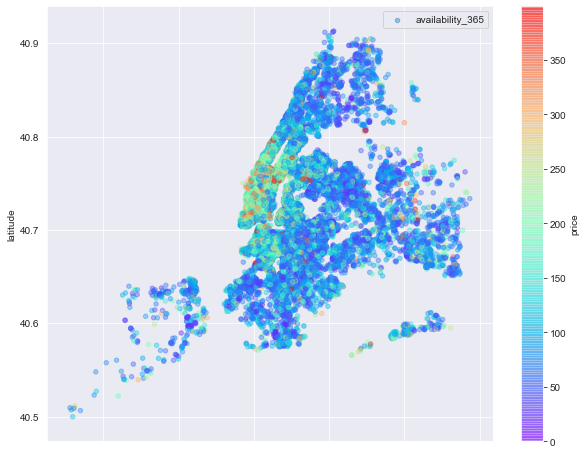

In [42]:
priceless400.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('rainbow'), colorbar=True, alpha=0.4, figsize=(10,8))

Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing.

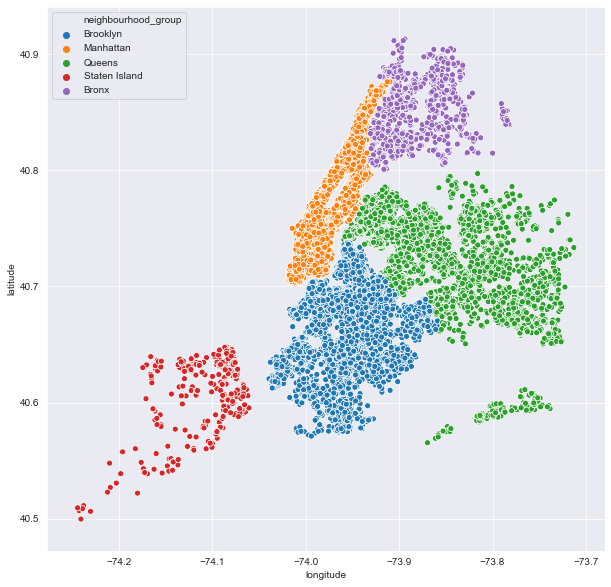

In [43]:
plt.figure(figsize = (10,10))
sns.scatterplot(df.longitude, df.latitude, hue = df.neighbourhood_group)
plt.ioff()
#Based on the Neighbourhood

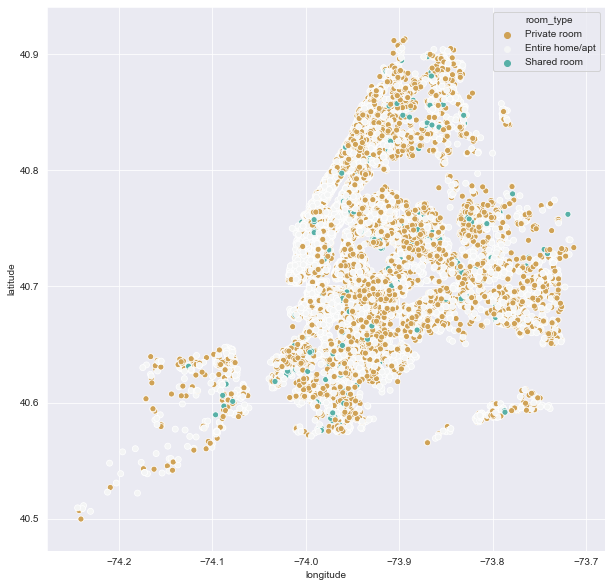

In [44]:
plt.figure(figsize = (10,10))
sns.scatterplot(df.longitude, df.latitude, hue = df.room_type,
               palette='BrBG')
plt.ioff()
#Based on Room Type

## Label encoding for the categorical variables

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.neighbourhood_group = le.fit_transform(df.neighbourhood_group)
df.neighbourhood = le.fit_transform(df.neighbourhood)
df.room_type = le.fit_transform(df.room_type)

# MODEL BUILDING


## TRAIN-VALIDATION SPLIT

In [46]:
X = df.drop('price',axis = 1)
y = df['price']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
seed=10
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = seed)

In [49]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(36671, 12) (12224, 12) (36671,) (12224,)


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_valid)

# DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeRegressor
regr_DT = DecisionTreeRegressor(random_state=0,max_depth=7)

In [52]:
regr_DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [53]:
y_pred = regr_DT.predict(X_valid)

In [54]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: {0} ------- Depth: {1}".format(mean_absolute_error(y_valid,y_pred),regr_DT.get_depth()))

Mean Absolute Error: 66.74576434608664 ------- Depth: 7


In [55]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,y_pred))


Mean Absolute Error:  66.74576434608664
Mean Squared Error:  46242.30688771083
Root Mean Squared Error:  215.04024480945614
Explained Variance Score:  -0.1736684506098849


In [56]:
lst_MAE = []
lst_depths = []
for depths in range(1, 20):
    regr_DT = DecisionTreeRegressor(random_state=10, max_depth=depths)
    regr_DT.fit(X_train, y_train)
    preds = regr_DT.predict(X_valid)
    current_MAE = mean_absolute_error(y_valid, preds)
    lst_MAE.append(current_MAE)
    lst_depths.append(depths)

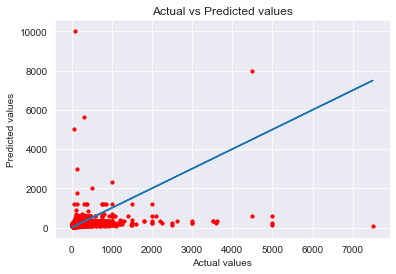

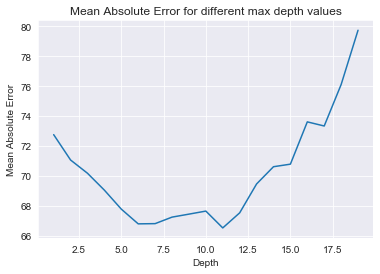

In [57]:
import matplotlib
matplotlib.pyplot.figure(1)
matplotlib.pyplot.plot(y_valid, y_valid)
matplotlib.pyplot.scatter(y_valid, y_pred, s=10, c="red")
matplotlib.pyplot.title("Actual vs Predicted values")
matplotlib.pyplot.xlabel("Actual values")
matplotlib.pyplot.ylabel("Predicted values")

matplotlib.pyplot.figure(2)
matplotlib.pyplot.plot(lst_depths, lst_MAE)
matplotlib.pyplot.title("Mean Absolute Error for different max depth values")
matplotlib.pyplot.xlabel("Depth")
matplotlib.pyplot.ylabel("Mean Absolute Error")

matplotlib.pyplot.show()

# KNN

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)


0.045975130890052354


In [61]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))


Mean Absolute Error:  98.60700261780104
Mean Squared Error:  76224.41377617801
Root Mean Squared Error:  276.08769218525117
Explained Variance Score:  -0.015837762153498636


# Cons
The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
predictions1=rf.predict(X_valid)

In [64]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions1))


Mean Absolute Error:  63.98664955807765
Mean Squared Error:  31712.578760238408
Root Mean Squared Error:  178.08025932213377
Explained Variance Score:  0.19506092942891873


In [65]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_valid, y_valid)
rf.score(X_valid, y_valid)
print("Accuracy of random forest model",rf.score(X_valid, y_valid))

Accuracy of random forest model 0.8711998907608324


# SVM

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
SupportVectorRegModel=SVR(kernel='poly')
SupportVectorRegModel.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
sv_pred=SupportVectorRegModel.predict(X_valid)

In [69]:
MSE=mean_squared_error(y_valid,sv_pred)
print("MSE:",MSE)

MSE: 41206.64759006792


In [70]:
RMSE=np.sqrt(MSE)
print(RMSE)

202.9942058041754


In [71]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,sv_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,sv_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,sv_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,sv_pred))


Mean Absolute Error:  80.71388348811112
Mean Squared Error:  41206.64759006792
Root Mean Squared Error:  202.9942058041754
Explained Variance Score:  -0.0013517727609830832


In [72]:
print('r2 score is:')
r2 = r2_score(y_valid,sv_pred)
r2*100

r2 score is:


-4.609451826800193

R^2 (coefficient of determination) regression score function.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
So according to the R square value which we got it can be interpreted that SVM performs worst for this data

# XGBOOST 

In [73]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_valid = XGB.predict(X_valid)

In [74]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

Mean Absolute Error : 16.952751


In [75]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions))

Mean Absolute Error:  16.952751
Mean Squared Error:  1407.0758
Root Mean Squared Error:  37.51101
Explained Variance Score:  0.9391326904296875


In [76]:
print('r2 score is:')
r2 = r2_score(y_valid,predictions)
r2*100

r2 score is:


93.91236329630868

In [77]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_valid).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)

In [78]:
error_diff1.head()

Actual Values  Predicted Values
0     206.675186        218.421997
1     139.026047        126.165474
2      45.050922         58.970581
3      91.341469         88.599213
4     182.166626        158.298935

In [79]:
import plotly.graph_objs as go
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()

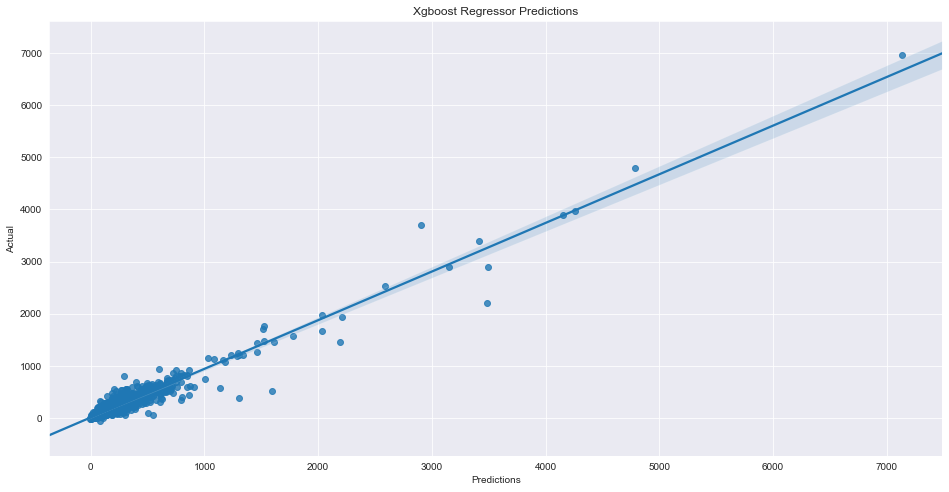

In [80]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_valid)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Xgboost Regressor Predictions")
plt.show()

# MLR

In [81]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred=reg.predict(X_valid)

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_valid,y_pred)

0.2127627174864083

In [85]:
# using mean squared error (MSE) to evaluate the performance of our model 
# MSE is the average of the square of the difference between the original and predicted values of the data

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))

Mean Squared Error: 18195.93692390782


In [86]:
# RMSE is the standard deviation of the errors
# it is same as MSE but the root of the value is considered

print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Root Mean Squared Error 134.89231602989037


Through our data analysis, visualizations, and modeling, we answered three questions about the AirBnB dataset.
The Superhost requirements published by AirBnB are not always critically enforced, with some hosts qualifying for the status even without meeting all the criteria.

Average prices change by the season, and holidays influence prices as well. There are increases in times near Christmas, and New Year’s as availability goes down.

The characteristics that most influence price for listings are how long a host has been active, availability of listings, amenities provided, total nights included, and security deposit. These qualities help distinguish houses with low prices from those that have high prices.

These findings provide a lot of interesting insights into the world of AirBnB hosting.